<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/04_poly_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Dokumentacja API: [https://scikit-learn.org/stable/modules/classes.html](https://scikit-learn.org/stable/modules/classes.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

### Spis treści:
1. [Polynomial Regression - Regresja Wielomianowa](#a1)
2. [Ekstrakcja cech wielomianowych - stopień 2](#a2)
3. [Dopasowanie modelu](#a3)
4. [Ekstrakcja cech wielomianowych - stopień 3](#a4)
5. [Dopasowanie modelu](#a5)

In [1]:
import sklearn
sklearn.__version__

'0.21.3'

### <a name='a1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

Rozważmy model regresji liniowej:
$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$
Dodając cechy wileomianowe otrzymujemy:
$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$z = [1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$
Wrzucając to z powrotem do naszego modelu dotrzymujemy prosty model liniowy:
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $\hat{y}(w,x)=w_0+w_1x_1$


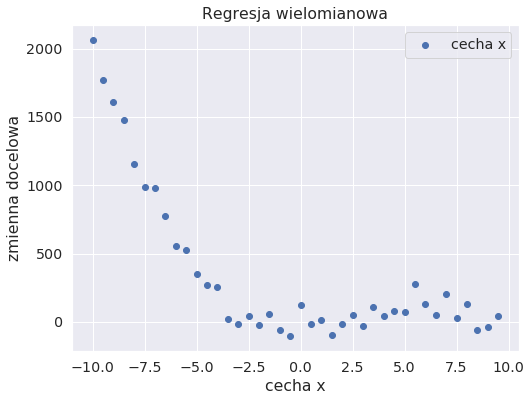

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

np.random.seed(42)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)
plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

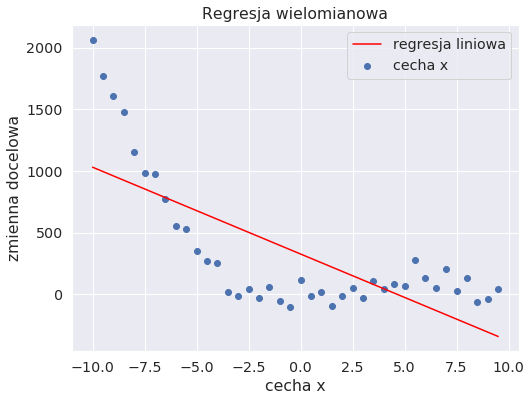

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)


plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

In [4]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu do naszego problemu.

Rozważmy model regresji liniowej:
$$\hat{y}(w, x) = w_0 + w_1 x_1$$
Dodając cechy wielomianowe otrzymujemy:
$$\hat{y}(w, x) = w_0 + w_1 x_1 +w_2x_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$z = [1, x_1, x_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2$$

###  <a name='a2'></a> Ekstrakcja cech wielomianowych - stopień 2

In [5]:
X[0]

array([-10.])

In [6]:
import pandas as pd
df = pd.DataFrame(data={'X': X.ravel()})
df.head(10)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.00000e+00, -1.00000e+01,  1.00000e+02, -1.00000e+03],
       [ 1.00000e+00, -9.50000e+00,  9.02500e+01, -8.57375e+02],
       [ 1.00000e+00, -9.00000e+00,  8.10000e+01, -7.29000e+02],
       [ 1.00000e+00, -8.50000e+00,  7.22500e+01, -6.14125e+02],
       [ 1.00000e+00, -8.00000e+00,  6.40000e+01, -5.12000e+02],
       [ 1.00000e+00, -7.50000e+00,  5.62500e+01, -4.21875e+02],
       [ 1.00000e+00, -7.00000e+00,  4.90000e+01, -3.43000e+02],
       [ 1.00000e+00, -6.50000e+00,  4.22500e+01, -2.74625e+02],
       [ 1.00000e+00, -6.00000e+00,  3.60000e+01, -2.16000e+02],
       [ 1.00000e+00, -5.50000e+00,  3.02500e+01, -1.66375e+02],
       [ 1.00000e+00, -5.00000e+00,  2.50000e+01, -1.25000e+02],
       [ 1.00000e+00, -4.50000e+00,  2.02500e+01, -9.11250e+01],
       [ 1.00000e+00, -4.00000e+00,  1.60000e+01, -6.40000e+01],
       [ 1.00000e+00, -3.50000e+00,  1.22500e+01, -4.28750e+01],
       [ 1.00000e+00, -3.00000e+00,  9.00000e+00, -2.70000e+01],
       [ 1.00000e+00, -2.

In [8]:
X_poly[:, 0].shape

(40,)

In [9]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2', 'x^3']
df.head(10)

,1,x,x^2,x^3
0,1.0,-10.0,100.00,-1000.000
1,1.0,-9.5,90.25,-857.375
2,1.0,-9.0,81.00,-729.000
3,1.0,-8.5,72.25,-614.125
4,1.0,-8.0,64.00,-512.000
5,1.0,-7.5,56.25,-421.875
6,1.0,-7.0,49.00,-343.000
7,1.0,-6.5,42.25,-274.625
8,1.0,-6.0,36.00,-216.000
9,1.0,-5.5,30.25,-166.375


###  <a name='a3'></a> Dopasowanie modelu

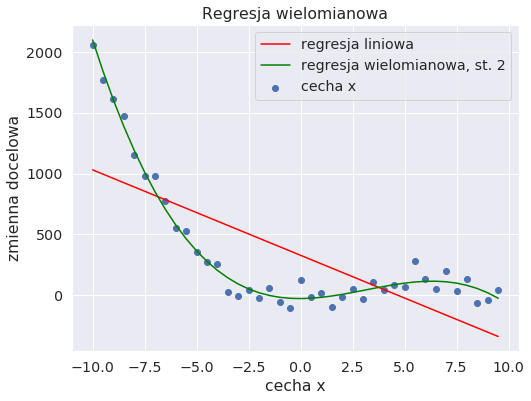

In [10]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)


plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [11]:
r2_score(y, y_pred_2)

0.9841708613657418

###  <a name='a4'></a> Ekstrakcja cech wielomianowych - stopień 3

In [12]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

###  <a name='a5'></a> Dopasowanie modelu

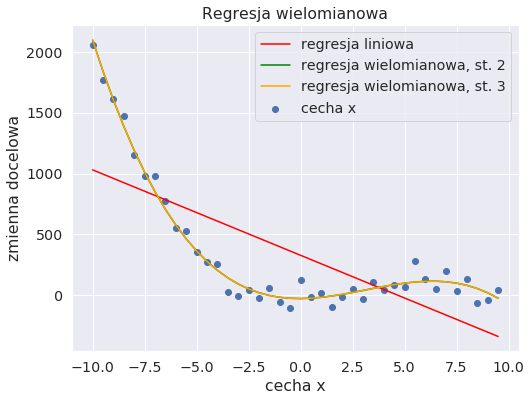

In [13]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [14]:
r2_score(y, y_pred_3)

0.9841708613657418